In [20]:
import pandas as pd
import numpy as np
from sklearn import tree

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

Importar os dados e vizualizar

In [21]:
data = pd.read_csv('data/cleaned_data.csv')

data.head()

,price,sqft_living,grade,yr_built,zipcode
0,0.0,1180,7,1955,98178
1,2.0,2570,7,1951,98125
2,0.0,770,6,1933,98028
3,2.0,1960,7,1965,98136
4,2.0,1680,8,1987,98074


Separar os dados da resposta esperada pelos dados.

In [22]:
from sklearn.model_selection import train_test_split

targets = data['price']

attributes = data.drop(['price'], axis=1)


In [23]:
#Só dar uma olhada nos atributos selecionados:
attributes.describe()

,sqft_living,grade,yr_built,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,2079.899736,7.656873,1971.005136,98077.939805
std,918.440897,1.175459,29.373411,53.505026
min,290.000000,1.000000,1900.000000,98001.000000
25%,1427.000000,7.000000,1951.000000,98033.000000
50%,1910.000000,7.000000,1975.000000,98065.000000
75%,2550.000000,8.000000,1997.000000,98118.000000
max,13540.000000,13.000000,2015.000000,98199.000000


Tentar encontrar a árvore de decisão com a profundidade ideal (parece que é 9). Para esse caso é considerado o test_size arbitrário de 25%, mas isso é mudado nas próximas células

In [24]:
x_train, x_test, y_train, y_test = train_test_split(attributes, targets, test_size=0.25)

depth = np.arange(1,25)

decision_tree = tree.DecisionTreeClassifier(max_depth = 17)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=17)

In [25]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [26]:
y_pred = decision_tree.predict(x_test)
print('acuracia', accuracy_score(y_test, y_pred))
print('mse: ', mse(y_test, y_pred))
print('r2: ', r2_score(y_test, y_pred))

acuracia 0.6741302738712065
mse:  0.46632124352331605
r2:  0.6276604194387023


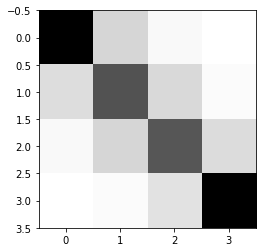

In [27]:
plt.imshow(confusion_matrix(y_test, y_pred), cmap='Greys')

Salvar a árvore treinada

In [28]:
import pickle

filename = 'tree.pkl'
pickle.dump(decision_tree, open(filename, 'wb'))